# Homework 2: Classification Practice Problem <25 points in total>

In this practice probelm, you will learn how to use common machine learning packages (sklearn) to do classification tasks and explore a few ML classification algorithms.

`expression_multi.csv` is a 1080 x 78 matrix of protein expression levels of 77 proteins (each column represents a protein) for 1080 individual samples/mice (each row represents a sample).

The last column is the classification/ground truth of the sample (from 0 to 7).


Our goal is to classify samples into one of the eight classes using their protein expression levels. <br>




---







**Description of the dataset:**

The dataset is modified from UCI-machine learning repository: https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression, you are free to take a look at the dataset description, but it is not necessary to do so for this assignment.

The eight classes of sample(mice) are described based on features such as genotype, behavior and treatment. According to genotype, mice can be control or trisomic. According to behavior, some mice have been stimulated to learn (context-shock) and others have not (shock-context) and in order to assess the effect of the drug memantine in recovering the ability to learn in trisomic mice, some mice have been injected with the drug and others have not.


Classes:<br>

0: c-CS-m: control mice, stimulated to learn, injected with memantine <br>
1: c-SC-m: control mice, not stimulated to learn, injected with memantine <br>
2: c-CS-s: control mice, stimulated to learn, injected with saline <br>
3: c-SC-s: control mice, not stimulated to learn, injected with saline <br>
4: t-CS-m: trisomy mice, stimulated to learn, injected with memantine <br>
5: t-SC-m: trisomy mice, not stimulated to learn, injected with memantine <br>
6: t-CS-s: trisomy mice, stimulated to learn, injected with saline <br>
7: t-SC-s: trisomy mice, not stimulated to learn, injected with saline <br>








## Introduction:

In this notebook, we will first look at the dataset together and visulaize the samples in 2D. <br>

In Task 1, we will perform normalization on the dataset and think about how that is helpful. <br>


In Task 2, you will implement three different ML classifiers to classify the samples into one of the eight classes. You will also explore the effect of a hyperparameter in random forest.





<font color='Red'> Note that you will only have to answer the questions in the notebook. There will be notebook cells for you to write your answers. You do not need to write the answers from this notebook on the PDF file this time. You will need to submit the notebook (which includeds your answers and code) on gradescope </font>





## To sum up: What needs to be done-

### Task 1. <15 points>

Complete the code for `record_statistics` <br>
Complete the code for `MinMaxNormalize` <br>
Answer the questions from (1)-(4).<br>

### Task 2. <10 points>

Complete the code for the three ML models. <br>
You will get full credit if the test accuracy is > 85% <br>



Complete the code to plot the required plots. <br>
Answer the questions from (1)-(2). <br>



## Environment

To run the code in the notebook, you may have to install `numpy`, `torch`, `sckikit-learn`, `pandas`, `seaborn` and `matplotlib`, if you haven't done so and are running it locally.

In [2]:
#import the packages
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Read in the data
First, let's read in the mice protein expression data that we will use for the classification.

In [3]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1XpPNRdxut7XaIQ-FyeJTCnAKZJUXRz6v' -O expression_multi.csv

--2024-03-07 02:06:21--  https://drive.google.com/uc?export=download&id=1XpPNRdxut7XaIQ-FyeJTCnAKZJUXRz6v
Resolving drive.google.com (drive.google.com)... 108.177.111.139, 108.177.111.100, 108.177.111.102, ...
Connecting to drive.google.com (drive.google.com)|108.177.111.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1XpPNRdxut7XaIQ-FyeJTCnAKZJUXRz6v&export=download [following]
--2024-03-07 02:06:22--  https://drive.usercontent.google.com/download?id=1XpPNRdxut7XaIQ-FyeJTCnAKZJUXRz6v&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.111.132, 2607:f8b0:4001:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.111.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 975412 (953K) [application/octet-stream]
Saving to: ‘expression_multi.csv’

expression_multi.cs 100%[===================>] 952.55

In [4]:
#read the protein expression matrix
df = pd.read_csv("/content/expression_multi.csv") #note: if you are running locally, chage it to the correct path
df

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,0
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,0
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,0
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,0
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.129954,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.190483,NaN,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,7
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.190463,NaN,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,7
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.216682,NaN,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,7
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.222263,NaN,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,7


In [5]:
#define X and Y
X = df.iloc[:,0:77]
# Fill NaN values with the mean value
X = X.fillna(X.mean(), inplace=False)
Y = df.iloc[:,77]

In [6]:
print(X)
X.shape

      DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0     0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1     0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2     0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3     0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4     0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   
...        ...       ...       ...       ...       ...       ...       ...   
1075  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736  0.171262   
1076  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274  0.182496   
1077  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665  0.161435   
1078  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897  0.173623   
1079  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001  0.191811   

      pCAMKII_N   pCREB_N    pELK_N  ...     SHH_N     BAD_N   

(1080, 77)

In [7]:
Y.shape

(1080,)

## Visualizing the original dataset in 2D

Next, we can use PCA to reduce the dimension of the dataset and visualize it

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def Plot2D(X_2D):
    colors = ["red", "orange", "pink", "yellow", "blue", "green",  "purple", "black"]
    mice_class = ['class 0',
                'class 1',
                'class 2',
                'class 3',
                'class 4',
                'class 5',
                'class 6',
                'class 7']

    for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5, 6 ,7], mice_class):
        plt.scatter(
            X_2D[Y == i, 0], X_2D[Y == i, 1], color=color, alpha=0.8, label=target_name
        )
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.title("2D visualization of the dataset")
    plt.xlabel('PC1')
    plt.ylabel('PC2')

    plt.figure()





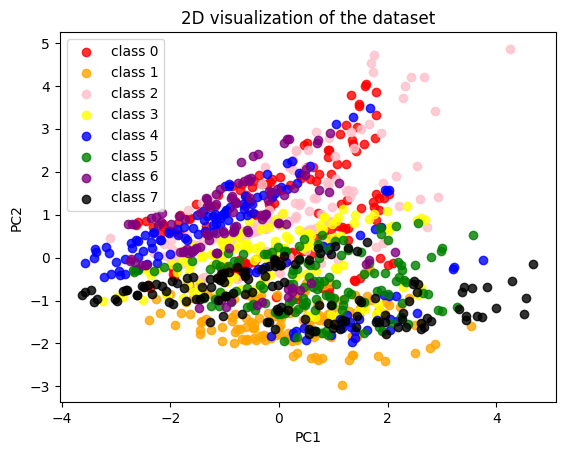

<Figure size 640x480 with 0 Axes>

In [9]:
#PCA on the original dataset

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)


#visualize the original dataset:

Plot2D(X_pca)

# Task1: Normalizing the dataset <15 points>




Complete the code below with the <font color='green'>#TODO</font> labels.

After completing and executing the code, answer the questions 4 below in the next markdown cell: <br>
(1) What are the features with the smallest and largest standard deviation? What are their standard deviations? When calculating the standard deviation of your dataset, it's important to use the sample standard deviation formula, which divides by N-1 (where N is the number of observations). This approach, known as using one degree of freedom (ddof=1), corrects for bias in variance estimates from samples.

Ensure to adjust the degrees of freedom accordingly in your calculations, regardless of the software or library you choose, to align with statistical best practices. <4 points> <br>
(2) What are the features with the smallest and largest mean? What are their means ? <4 points> <br>
(3) How will you implement the normalization?<5 points> <br>
(4) Take a look at the visualization of the 2D dataset after normalization. <br>
 What are the classes that would be harder for machine learning algorithms to seperate from one another? Write 1~2 sentences to explain the reasons. <2 points>

 For questions 1~2, fill your answers in the function `record_statistics`

<font color='Red'> Answer the questions in this cell</font>


Answer to Task1-(4):
After completing and executing the code, answer the questions 4 below in the next markdown cell:


(1) What are the features with the smallest and largest standard deviation? What are their standard deviations? When calculating the standard deviation of your dataset, it's important to use the sample standard deviation formula, which divides by N-1 (where N is the number of observations). This approach, known as using one degree of freedom (ddof=1), corrects for bias in variance estimates from samples.
Ensure to adjust the degrees of freedom accordingly in your calculations, regardless of the software or library you choose, to align with statistical best practices. <4 points> DONE


(2) What are the features with the smallest and largest mean? What are their means ? <4 points> DONE


(3) How will you implement the normalization?<5 points>

Normalization is computed using the MinMaxScaler from Scikit-learn, a tool that scales and transforms each feature such that it is default range between 0 and 1. This process is done by subtracting the minimum value of each feature and then dividing by the range of that feature. The range is the difference between the original maximum and minimum values of the feature. Implementing normalization in this way ensures that all input features have the same scale, reducing bias towards features with larger magnitudes.


(4) Take a look at the visualization of the 2D dataset after normalization.
What are the classes that would be harder for machine learning algorithms to seperate from one another? Write 1~2 sentences to explain the reasons. <2 points>

Classes in the PCA plot with significant overlap indicate that they share similar ranges of values for the proteins expressed, making it difficult for a model to distinguish between them based solely on these features. For example, classes 0, 4, and 6 over a lot. Classes 2,4, and 6 overlap alot. Also, another example of classes with significant overlap is classes 1,3 and 5. There are some other examples but these are the most prominent.

## Checking the feature distribution

Here, we want to check the mean and standard deviation of the protein expression level in each protein (feature).

In [10]:
#TODO:  Find the features with the largest and smallest standard deviation. And print the cooresponding standard deviation.
# Please use the X matrix, which we have filled the NaN values, instead of using `df` directlly.

# When calculating the standard deviation of your dataset, it's important to use
# the sample standard deviation formula, which divides by N-1 (where N is the
# number of observations). This approach, known as using one degree of freedom
# (ddof=1), corrects for bias in variance estimates from samples.

#Ensure to adjust the degrees of freedom accordingly in your calculations, regardless of the software or library you choose, to align with statistical best practices.
std_devs = X.std(ddof=1)
print(std_devs)
feature_max_std = std_devs.max()  # value of the largest std
feature_name_maxstd = std_devs.idxmax() #name of the feature with the largest std

feature_min_std = std_devs.min() # value of the smallest std
feature_name_minstd = std_devs.idxmin() #name of the feature with the smallest std




print(f'the feature with the largest std is: {feature_name_maxstd}. The std is {feature_max_std}')
print(f'the feature with the smallest std is: {feature_name_minstd}. Ths std is {feature_min_std}')
#the feature with the largest std is: pCAMKII_N. The std is 1.293367701016041
#the feature with the smallest std is: GFAP_N. Ths std is 0.013233318836526302


DYRK1A_N     0.249015
ITSN1_N      0.251290
BDNF_N       0.049314
NR1_N        0.346810
NR2A_N       0.931802
               ...   
SYP_N        0.066432
H3AcK18_N    0.054222
EGR1_N       0.036261
H3MeK4_N     0.048069
CaNA_N       0.317126
Length: 77, dtype: float64
the feature with the largest std is: pCAMKII_N. The std is 1.293367701016041
the feature with the smallest std is: GFAP_N. Ths std is 0.013233318836526302


In [11]:
#TODO:  Find the features with the largest and smallest mean. And print the cooresponding mean.
means = X.mean()
feature_max_mean = means.max() # value of the largest mean
feature_max = means.idxmax() #name of the feature with the largest mean

feature_min_mean = means.min()  # value of the smallest mean
feature_min = means.idxmin() #name of the feature with the smallest mean

print(f'the feature with the largest mean is: {feature_max} . The mean is {feature_max_mean}')
print(f'the feature with the smallest mean is: {feature_min}. The mean is {feature_min_mean}')
#the feature with the largest mean is: NR2A_N . The mean is 3.843933946299907
#the feature with the smallest mean is: GFAP_N. The mean is 0.12088914805462962


the feature with the largest mean is: NR2A_N . The mean is 3.843933946299907
the feature with the smallest mean is: GFAP_N. The mean is 0.12088914805462962


In [12]:
##export
### DO NOT CHANGE ANY CODE ABOVE THIS LINE IN THIS CELL ###
def record_statistics():
  # TODO: After you find the correct answers from the above questions, fill the
  # following variables with the values you find in the outputs. For real numbers,
  # please keep at least six decimal places.
  feature_max_std = 1.293367701016041
  feature_name_maxstd = 'pCAMKII_N'
  feature_min_std = 0.013233318836526302
  feature_name_minstd = 'GFAP_N'
  feature_max_mean = 3.843933946299907
  feature_max = 'NR2A_N'
  feature_min_mean = 0.12088914805462962
  feature_min = 'GFAP_N'
  return feature_max_std, feature_name_maxstd, feature_min_std, feature_name_minstd, feature_max_mean, feature_max, feature_min_mean, feature_min
#the feature with the largest std is: pCAMKII_N. The std is 1.293367701016041
#the feature with the smallest std is: GFAP_N. Ths std is 0.013233318836526302
#the feature with the largest mean is: NR2A_N . The mean is 3.843933946299907
#the feature with the smallest mean is: GFAP_N. The mean is 0.12088914805462962

In [13]:
record_statistics()

(1.293367701016041,
 'pCAMKII_N',
 0.013233318836526302,
 'GFAP_N',
 3.843933946299907,
 'NR2A_N',
 0.12088914805462962,
 'GFAP_N')

## Normalizing the dataset


A common practice before training ML models is to normalize the dataset. It helps to correct each feature into the same scale, so the ML model will not have an underlying bias toward the feature with larger scales. <br>




Now, let's normalize the dataset using min-max normalization with Scikit learn. <br>

Take a look at the url below to understand what is performed in min-max normalization. <br>

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [14]:
#export
### DO NOT CHANGE ANY CODE ABOVE THIS LINE IN THIS CELL ###

# TODO: Normalize the dataset X with min-max normalization using Scikit learn
from sklearn.preprocessing import MinMaxScaler

def MinMaxNormalize(X):
  # TODO: Complete the function
  scaler = MinMaxScaler()
  X_norm = scaler.fit_transform(X)
  return X_norm

In [15]:
X_norm = MinMaxNormalize(X) #X after normalization
print(X_norm)

[[0.1511224  0.21288505 0.82463786 ... 0.10288975 0.08457952 0.70573764]
 [0.1557504  0.18822566 0.77645463 ... 0.11587379 0.09397699 0.74977105]
 [0.15345859 0.20569615 0.79357192 ... 0.10904993 0.08216206 0.86822857]
 ...
 [0.03516306 0.06355603 0.31137014 ... 0.48463073 0.81196194 0.54710006]
 [0.03201796 0.07107097 0.33717276 ... 0.57133648 0.84445032 0.52973884]
 [0.06634184 0.09150314 0.37013319 ... 0.57791409 0.84420951 0.50833567]]


## Visualizing the normalized dataset

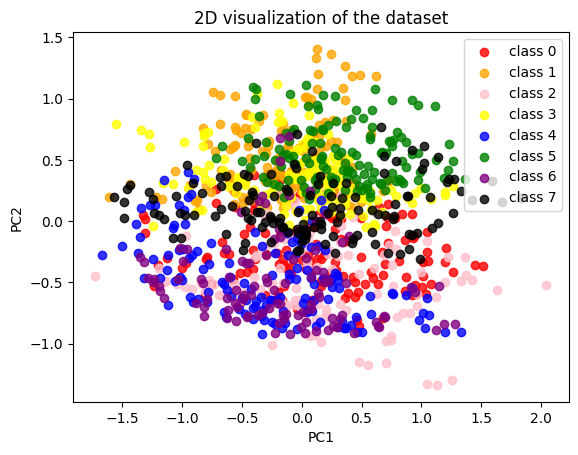

<Figure size 640x480 with 0 Axes>

In [16]:
#--no modification needed--
#PCA on the normalized dataset
pca = PCA(n_components=2)
pca.fit(X_norm)
X_pca = pca.transform(X_norm)


#visualize the normalized dataset in 2D:
Plot2D(X_pca)

# Task2: Training machine learning classifiers

In this task, you will implement three machine learning classifiers:  <2 points for each> <br>



*   Random forest

 -   For random forest, you have some additional required subtasks (all predictions are on the validation set):

      (a) Try setting max_depth of random forest from 2 to 9 (inclusive) with random_state=0. Leave the rest of the hyperparameters at their default values. <br> Obtain the accuracy from each, and plot a line plot where  x axis is max_length and y axis is the accuracy scores from the random forest classifiers. <br>

      (b) Generate a heatmap of a confusion matrix from the random forest classifier that has the worst accuracy. <br>



*   Logistic Regression <br>
*   SVM <br>

You will train them on the training dataset: X_train, Y_train and evaluate the hyperparameters on the validation dataset : X_val, Y_val<br>
You are free to explore the the hyperparameters in each classifier <br>




Complete the code below with the <font color='green'>#TODO</font> labels.

After completing and executing the code, answer the questions below in the next markdown cell: <br>

(1) Explain in 2~3 sentences what you obeserved from the line plot in subtask (a) and provide an explanation. <2 points>

(2) Observe what classes are hard to classify for the model using the confusion matrix from subtask (b). Does the 2D visualization plot (after normalization) in task 1 help explain the results? <2 points>




<font color='Red'> Answer the questions in this cell</font>


Answer to Task2-(1):

As the max_depth parameter of the Random Forest classifier increases from 2 to 6, the validation accuracy improves significantly. This trend suggests that allowing the trees to grow deeper helps the model to capture more complex patterns in the data, leading to better performance. However, beyond a max_depth of 6, the increase in accuracy plateaus, indicating that further deepening the trees could possibly make the model overfit the training data and does not contribute to significant improvements in validation accuracy.


Answer to Task2-(2):

The confusion matrix reveals that classes 2 and 3, as well as 4 and 5, are particularly challenging for the model to differentiate, as indicated by the significant number of misclassified instances between these pairs. The 2D visualization plot after PCA shows substantial overlap between the data points of these classes (2 and 4, 3 and 5), providing a visual explanation for the confusion matrix results. Therefore, the PCA plot confirms that the proximity of classes in the reduced feature space contributes to the difficulty the model experiences in distinguishing between them.


First divide our data into a train, validation, and test dataset.

In [21]:
######## do not change anything in this cell ########

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y.to_numpy(), test_size=0.2, random_state=0)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=0)

print(f'training set has {Y_train.size} samples, validation set has {Y_val.size} samples, and test set has {Y_test.size} samples' )

training set has 648 samples, validation set has 216 samples, and test set has 216 samples


In [22]:
#import the packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import seaborn as sn

## Random Forest

In [33]:
# TODO: implement Random Forest

rf_classifier =  RandomForestClassifier()
rf_classifier.fit(X_train, Y_train)
Y_train_pred = rf_classifier.predict(X_train) #predictions from the train set
print('the accuracy of the training set is: ', accuracy_score(Y_train,Y_train_pred))
Y_val_pred = rf_classifier.predict(X_val) #predictions from the validation set
print('the accuracy of the validation set is: ', accuracy_score(Y_val,Y_val_pred))



the accuracy of the training set is:  1.0
the accuracy of the validation set is:  0.9675925925925926


Try setting max_depth of random forest from 2 to 9 (inclusive) and set random_state=0. Leave the rest of the hyperparameters at their default values. <br>
Obtain the accuracy on the validation set from each, and plot a line plot where  x axis is max_depth and y axis is the accuracy scores of validation set from the random forest classifiers. <br>



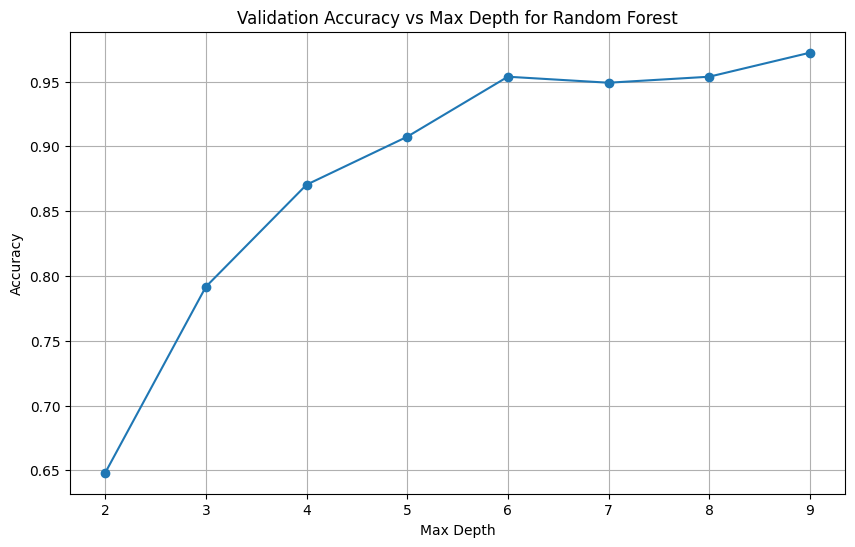

In [34]:
#TODO: draw a line plot with the accuracy of different classifiers
max_depth_values = list(range(2, 10))
accuracy_scores = []
for max_depth in max_depth_values:
    rf_classifier = RandomForestClassifier(max_depth=max_depth, random_state=0)
    rf_classifier.fit(X_train, Y_train)
    Y_val_pred = rf_classifier.predict(X_val)
    accuracy = accuracy_score(Y_val, Y_val_pred)
    accuracy_scores.append(accuracy)
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, accuracy_scores, marker='o')
plt.title('Validation Accuracy vs Max Depth for Random Forest')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(max_depth_values)
plt.grid(True)
plt.show()

Now, use the random forest classifier with the max_depth that produced the **worst** accuracy to make predictions on the validation set.


Plot a heatmap that shows a confusion matrix with the predictions and the actual labels of the validation set. <br>


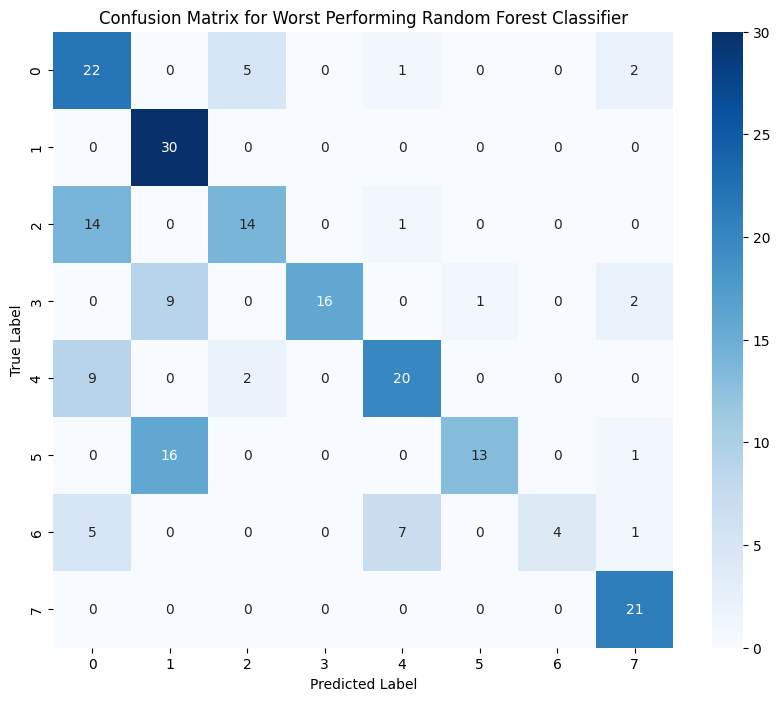

In [37]:
#TODO: plot a heatmap of the confusion matrix on the validation set
worst_depth = max_depth_values[accuracy_scores.index(min(accuracy_scores))]
worst_rf_classifier = RandomForestClassifier(max_depth=worst_depth, random_state=0)
worst_rf_classifier.fit(X_train, Y_train)
Y_val_pred_worst = worst_rf_classifier.predict(X_val)
cm = confusion_matrix(Y_val, Y_val_pred_worst)
# Plotting the heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sn.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for Worst Performing Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Logistic Regression

In [39]:
# TODO: implement Logistic regression

lr_classifier = LogisticRegression(random_state=0)
lr_classifier.fit(X_train, Y_train)
#evaluate the train set accuracy
Y_train_pred = lr_classifier.predict(X_train) #predictions from the train set
print('the accuracy of the training set is: ', accuracy_score(Y_train,Y_train_pred))

#evaluate the validation set accuracy
Y_val_pred = lr_classifier.predict(X_val) #predictions from the validation set
print('the accuracy of the validation set is: ', accuracy_score(Y_val,Y_val_pred))

the accuracy of the training set is:  0.9629629629629629
the accuracy of the validation set is:  0.9074074074074074


## SVM

In [42]:
# TODO: implement SVM
svm_classifier = SVC(kernel='rbf', C=1.0, random_state=0)
svm_classifier.fit(X_train, Y_train)
#evaluate the train set accuracy
Y_train_pred = svm_classifier.predict(X_train) #predictions from the train set
print('the accuracy of the training set is: ', accuracy_score(Y_train,Y_train_pred))

#evaluate the validation set accuracy
Y_val_pred = svm_classifier.predict(X_val) #predictions from the validation set
print('the accuracy of the validation set is: ', accuracy_score(Y_val,Y_val_pred))

the accuracy of the training set is:  0.9938271604938271
the accuracy of the validation set is:  0.9583333333333334


## Evaluate the classifiers on the test set

In [43]:
Y_pred = rf_classifier.predict(X_test)
print('the accuracy of the test set using Random Forest Classifier is: ', accuracy_score(Y_test,Y_pred))


Y_pred = lr_classifier.predict(X_test)
print('the accuracy of the test set using Logistic Regression Classifier is: ', accuracy_score(Y_test,Y_pred))


Y_pred = svm_classifier.predict(X_test)
print('the accuracy of the test set using SVM Classifier  is: ', accuracy_score(Y_test,Y_pred))

the accuracy of the test set using Random Forest Classifier is:  0.9490740740740741
the accuracy of the test set using Logistic Regression Classifier is:  0.8842592592592593
the accuracy of the test set using SVM Classifier  is:  0.9305555555555556
